In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math
import random

# Opening the image

for this section I decided to resize the image in order to run the algorithm faster

In [295]:
# opening image
def open_image(path):
    img = Image.open('slider_puffin_before_mobile.jpg').resize((100,100))
    arr = np.array(img)
    return arr

In [296]:
img=open_image('slider_puffin_before_mobile.jpg')

In [297]:
img.shape

(100, 100, 3)

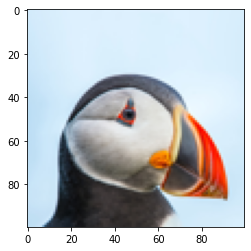

In [298]:
plt.imshow(img)

In [299]:
pixel_vectors=img.astype(np.float64).reshape(-1,3)

# Choosing Centroids

for choosing centroids I decided to use set() inorder to find completely different random centroids.
Additionally, I chose K to be 32 after several experiments

In [300]:
# choosing K
k=32

In [301]:
# Choosing centroids
centroids_set=set()

while len(centroids_set)<32:
    centroids_set.add(str(random.choice(pixel_vectors)))

In [302]:
centroids_set

{'[ 92.  97. 110.]',
 '[143. 134. 116.]',
 '[155.  81.   7.]',
 '[169. 117.  82.]',
 '[169. 141.  83.]',
 '[191. 223. 244.]',
 '[192. 198. 209.]',
 '[192. 224. 245.]',
 '[198. 226. 247.]',
 '[205. 231. 248.]',
 '[207. 234. 251.]',
 '[208. 209. 208.]',
 '[217. 239. 253.]',
 '[218. 217. 212.]',
 '[218. 240. 253.]',
 '[219. 240. 253.]',
 '[220. 239. 253.]',
 '[220. 240. 253.]',
 '[221. 240. 254.]',
 '[222. 241. 255.]',
 '[223. 241. 254.]',
 '[228. 223. 213.]',
 '[233.  39.   2.]',
 '[234. 210. 173.]',
 '[236. 232. 194.]',
 '[25. 25. 24.]',
 '[252.  20.   2.]',
 '[29. 43. 54.]',
 '[35. 35. 35.]',
 '[42. 42. 44.]',
 '[59. 55. 58.]',
 '[69. 64. 64.]'}

In [303]:
centroids=[]
for centroid in list(centroids_set):
    r,g,b=centroid.replace("[","").replace("]","").split(".")[:3]
    centroids.append(np.array([r,g,b],dtype=np.float64))

In [304]:
centroids

[array([218., 240., 253.]),
 array([208., 209., 208.]),
 array([234., 210., 173.]),
 array([29., 43., 54.]),
 array([252.,  20.,   2.]),
 array([155.,  81.,   7.]),
 array([207., 234., 251.]),
 array([217., 239., 253.]),
 array([219., 240., 253.]),
 array([69., 64., 64.]),
 array([35., 35., 35.]),
 array([220., 239., 253.]),
 array([192., 224., 245.]),
 array([223., 241., 254.]),
 array([233.,  39.,   2.]),
 array([191., 223., 244.]),
 array([221., 240., 254.]),
 array([169., 117.,  82.]),
 array([220., 240., 253.]),
 array([143., 134., 116.]),
 array([198., 226., 247.]),
 array([ 92.,  97., 110.]),
 array([59., 55., 58.]),
 array([192., 198., 209.]),
 array([42., 42., 44.]),
 array([222., 241., 255.]),
 array([218., 217., 212.]),
 array([205., 231., 248.]),
 array([169., 141.,  83.]),
 array([236., 232., 194.]),
 array([25., 25., 24.]),
 array([228., 223., 213.])]

In [305]:
first_centroids=centroids.copy()

# Distance function:

In [307]:
def distance_calc(pixel1,pixel2):
    return math.sqrt((pixel1[0]-pixel2[0])**2+(pixel1[0]-pixel2[0])**2+(pixel1[0]-pixel2[0])**2)

# Kmeans algorithm:

you can run below cell few times for better convergence

In [310]:
for iteration in tqdm(range(10)):
    previous_centroids=centroids.copy()
    count_centroid_dict={}
    sum_centroid_dict={}
    for centroid in centroids:
        count_centroid_dict[str(centroid)]=1
        sum_centroid_dict[str(centroid)]=np.array([0.0,0.0,0.0],dtype=np.float64)
    # finding centroid for every pixel
    for pixel in pixel_vectors:
        min_distance=math.inf
        min_centroid=None
        for centroid in centroids:
            tmp_dist=distance_calc(centroid,pixel)
            if tmp_dist<min_distance:
                min_distance=tmp_dist
                min_centroid=centroid
        count_centroid_dict[str(min_centroid)]+=1
        sum_centroid_dict[str(min_centroid)]+=pixel
    
    # updating centroids
    for i,centroid in enumerate(centroids):
        centroids[i]=np.divide(sum_centroid_dict[str(centroid)],count_centroid_dict[str(centroid)])
    difference=0
    for i in range(k):
        difference+=distance_calc(centroids[i],previous_centroids[i])
    if difference<20:
        break

 20%|████████████████▌                                                                  | 2/10 [00:13<00:54,  6.78s/it]


In [312]:
centroids

[array([207.43459916, 227.28902954, 240.04852321]),
 array([202.31784387, 222.74349442, 236.92007435]),
 array([226.56097561, 230.5       , 231.07317073]),
 array([27.46258503, 32.98639456, 38.9047619 ]),
 array([249.82183908,  88.68965517,  34.53448276]),
 array([134.8553719 , 129.12809917, 127.18595041]),
 array([197.83027523, 209.56422018, 219.05963303]),
 array([204.62650602, 223.99598394, 237.36947791]),
 array([211.43933824, 226.28308824, 236.48161765]),
 array([78.60244648, 77.76452599, 81.71865443]),
 array([37.91666667, 43.        , 49.03205128]),
 array([214.94011142, 233.35376045, 244.71727019]),
 array([176.70520231, 161.66473988, 154.79190751]),
 array([0., 0., 0.]),
 array([223.54589372, 232.24154589, 236.47101449]),
 array([165.04591837, 153.78061224, 149.17346939]),
 array([217.27991218, 237.02963776, 248.72557629]),
 array([151.40196078, 136.15686275, 128.62745098]),
 array([ 8.625, 11.75 , 14.125]),
 array([116.79497908, 112.12552301, 112.16736402]),
 array([186.02409

In [314]:
newimg_kmeans,newimg_raw_centroids=np.zeros(img.shape),np.zeros(img.shape)

# Using converged centroids after kmeans

In [315]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        min_distance=math.inf
        min_centroid=None
        for centroid in centroids:
            tmp_dist=distance_calc(centroid,img[i][j])
            if tmp_dist<min_distance:
                min_distance=tmp_dist
                min_centroid=centroid
        newimg_kmeans[i][j]=min_centroid

# Using the first random centroids before kmeans

In [316]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        min_distance=math.inf
        min_centroid=None
        for centroid in first_centroids:
            tmp_dist=distance_calc(centroid,img[i][j])
            if tmp_dist<min_distance:
                min_distance=tmp_dist
                min_centroid=centroid
        newimg_raw_centroids[i][j]=min_centroid

# Comparison between the main image and kmeans image and random centroids image

Text(0.5, 1.0, 'Main image')

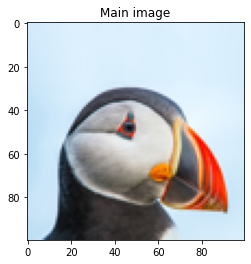

In [318]:
plt.imshow(img)
plt.title("Main image")

C:\Users\Adak\AppData\Local\Temp\ipykernel_21144\2002370347.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.imshow(newimg_raw_centroids.astype(np.int))


Text(0.5, 1.0, 'random first centroids')

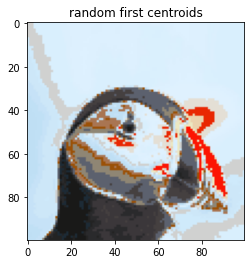

In [319]:
plt.imshow(newimg_raw_centroids.astype(np.int))
plt.title("random first centroids")

C:\Users\Adak\AppData\Local\Temp\ipykernel_21144\1440136404.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.imshow(newimg_kmeans.astype(np.int))


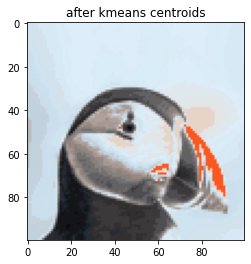

In [322]:
plt.imshow(newimg_kmeans.astype(np.int))
plt.title("after kmeans centroids")
plt.savefig("kmeans.jpg")